# Setting up

In [ ]:
import warnings
warnings.filterwarnings('ignore')

!wget https://www.dropbox.com/scl/fi/df9wwhemwn9gt0qtnq9ro/garden_dataset.zip?rlkey=2cjceu0zeesxdy9zwiga73nog&dl=0

In [1]:
!unzip garden_dataset.zip

Archive:  garden_dataset.zip
  inflating: __MACOSX/._garden_dataset  
  inflating: __MACOSX/garden_dataset/._sugarcane  
replace garden_dataset/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


## process dataset

In [1]:
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2

In [2]:
os.makedirs("./data/train/cassava")
os.makedirs("./data/train/grass")
os.makedirs("./data/train/maize")
os.makedirs("./data/train/sugarcane")

os.makedirs("./data/val/cassava")
os.makedirs("./data/val/grass")
os.makedirs("./data/val/maize")
os.makedirs("./data/val/sugarcane")

os.makedirs("./data/test/cassava")
os.makedirs("./data/test/grass")
os.makedirs("./data/test/maize")
os.makedirs("./data/test/sugarcane")

cassava = len(os.listdir('./garden_dataset/cassava'))
maize = len(os.listdir('./garden_dataset/maize'))
sugarcane = len(os.listdir('./garden_dataset/sugarcane'))
grass = len(os.listdir('./garden_dataset/grass'))

print(f"{cassava} Cassava Images")
print(f"{maize} Maize Images")
print(f"{sugarcane} Sugar Cane Images")
print(f"{grass} Grass Images")

327 Cassava Images
305 Maize Images
115 Sugar Cane Images
287 Grass Images


In [18]:
def populate_for_class(root_dir = 'data', training_ratio = 0.75, validation_ratio = 0.1):
  data_test = []
  data_train = []
  classes = [
      {
          "dir": 'garden_dataset/cassava',
          'text_label': 'cassava',
          "label": 0
      },
      {
          "dir": 'garden_dataset/grass',
          'text_label': 'grass',
          "label": 1
      },
      {
          "dir": 'garden_dataset/maize',
          'text_label': 'maize',
          "label": 2
      },
      {
          "dir": 'garden_dataset/sugarcane',
          'text_label': 'sugarcane',
          "label": 3
      }
  ]
  for dataset_class in classes:
    label = dataset_class['label']
    folder = dataset_class['text_label']
    src = dataset_class['dir']
    images = os.listdir(src)
    split = int(len(images) * training_ratio)
    for i, img in enumerate(images):
      train_limit = int(split * (1 - validation_ratio))
      if i < split:
        if i < train_limit:
          shutil.copy(os.path.join(src, img), os.path.join(f"{root_dir}/train/{folder}", img))
        else:
          shutil.copy(os.path.join(src, img), os.path.join(f"{root_dir}/val/{folder}", img))
      else:
        shutil.copy(os.path.join(src, img), os.path.join(f"{root_dir}/test/{folder}", img))

In [19]:
populate_for_class()

# Data Loading

In [5]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Dropout,  MaxPooling2D, Flatten, Dense, Input, Activation, BatchNormalization

In [20]:
# Constants
BATCH_SIZE = 32
EPOCHS=10

In [21]:
data_gen = ImageDataGenerator(rescale=1.0/255.0)

train_itr = data_gen.flow_from_directory(
    'data/train',
    target_size=(256, 256),
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

val_itr = data_gen.flow_from_directory(
    'data/val',
    target_size=(256, 256),
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

test_itr = data_gen.flow_from_directory(
    'data/test',
    target_size=(256, 256),
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 723 images belonging to 4 classes.
Found 234 images belonging to 4 classes.
Found 260 images belonging to 4 classes.


# Model training[Original Extracted Dataset]

In [28]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [29]:
opt = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(loss="categorical_crossentropy",optimizer=opt, metrics=['accuracy'])

In [30]:
history = model.fit(train_itr, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=val_itr)

Epoch 1/10
23/23 [==============================] - 81s 4s/step - loss: 1.0349 - accuracy: 0.6196 - val_loss: 0.7103 - val_accuracy: 0.7735
Epoch 2/10
23/23 [==============================] - 87s 4s/step - loss: 0.4624 - accuracy: 0.8686 - val_loss: 0.3879 - val_accuracy: 0.8718
Epoch 3/10
23/23 [==============================] - 91s 4s/step - loss: 0.2855 - accuracy: 0.9184 - val_loss: 0.3081 - val_accuracy: 0.8932
Epoch 4/10
23/23 [==============================] - 84s 4s/step - loss: 0.2082 - accuracy: 0.9447 - val_loss: 0.3059 - val_accuracy: 0.8590
Epoch 5/10
23/23 [==============================] - 72s 3s/step - loss: 0.1265 - accuracy: 0.9834 - val_loss: 0.2314 - val_accuracy: 0.9103
Epoch 6/10
23/23 [==============================] - 86s 4s/step - loss: 0.1021 - accuracy: 0.9848 - val_loss: 0.2481 - val_accuracy: 0.9060
Epoch 7/10
23/23 [==============================] - 92s 4s/step - loss: 0.0741 - accuracy: 0.9876 - val_loss: 0.1888 - val_accuracy: 0.9359
Epoch 8/10
23/23 [==

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 128)     

<AxesSubplot: >

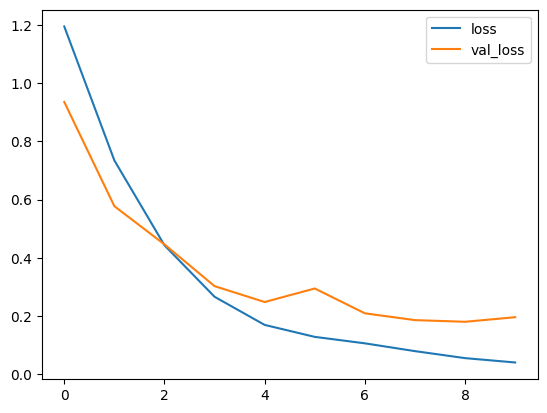

In [11]:
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()

<AxesSubplot: >

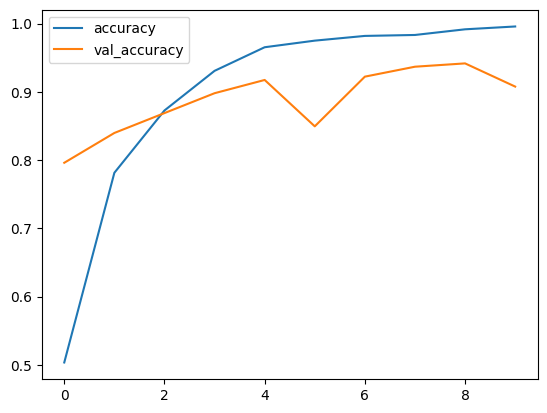

In [12]:
history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()

In [31]:
prediction = model.predict(test_itr)

9/9 [==============================] - 18s 2s/step


In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [33]:
pred_labels = np.argmax(prediction, axis=1)
print(classification_report(test_itr.classes, pred_labels))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86        82
           1       0.99      0.93      0.96        72
           2       0.90      0.83      0.86        77
           3       0.96      0.90      0.93        29

    accuracy                           0.90       260
   macro avg       0.91      0.90      0.90       260
weighted avg       0.90      0.90      0.90       260



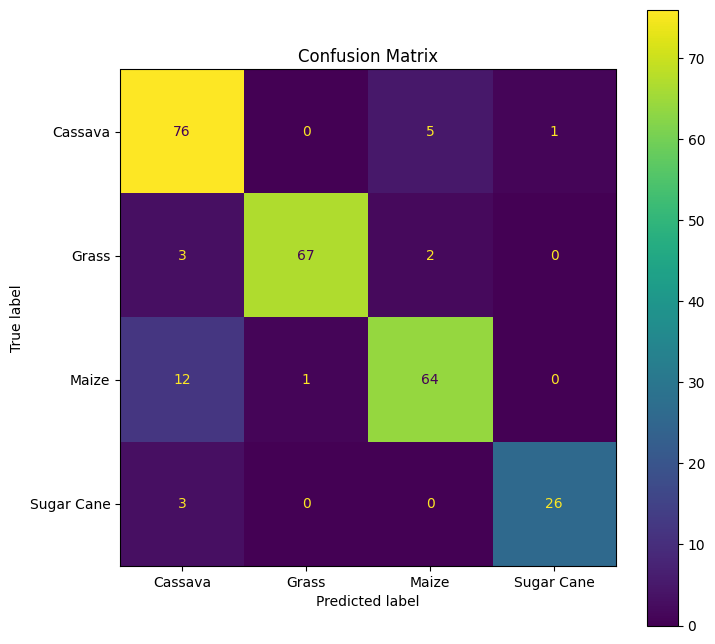

In [34]:
matrix = confusion_matrix(test_itr.classes, pred_labels)
cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels=['Cassava', 'Grass', 'Maize', 'Sugar Cane'])

plt.figure(figsize=(8,8))
plt.title(f"Confusion Matrix")
cm_display.plot(ax=plt.subplot())
plt.show()